In [5]:
import numpy as np #linear algebra
import pandas as pd #data processing. CSV file I/O (eg pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import os



In [6]:
df = pd.read_csv("/home/inlab/Downloads/trainINLAB.csv")
test = pd.read_csv("/home/inlab/Downloads/evalINLAB.csv")
df.head()

,CurrentAPSignal,NeighboringAPSignal,Mobility,BlockPropagationDelay,BlockReceivingTime,HandoverResult
0,22.0,35.0,7.2500,100.0,34,0
1,38.0,54.0,71.2833,160.0,6,1
2,26.0,58.0,88.0000,165.0,9,1
3,35.0,55.0,53.1000,170.0,43,1
4,28.0,34.0,8.4583,80.0,18,0


In [7]:
#checking if there is any missing value
df.isnull().sum().max()
df.columns

Index(['CurrentAPSignal', 'NeighboringAPSignal', 'Mobility',
       'BlockPropagationDelay', 'BlockReceivingTime', 'HandoverResult'],
      dtype='object')

In [8]:
#understanding the predicted value - which is hot encoded, in real life price won't be 
#hot encode
df['HandoverResult'].describe(), df['HandoverResult'].unique()

#there are 2 classes in the predicted value


(count    627.000000
 mean       0.387560
 std        0.487582
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        1.000000
 max        1.000000
 Name: HandoverResult, dtype: float64,
 array([0, 1]))

<AxesSubplot:>

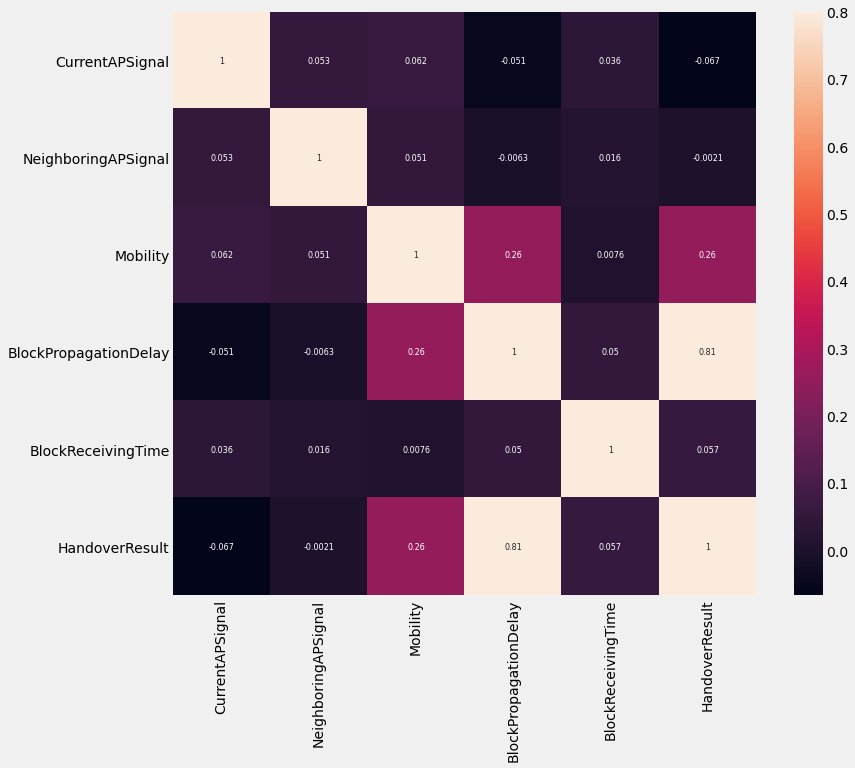

In [9]:
corrmat = df.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat, vmax=0.8 , square= True, annot=True, annot_kws={'size':8})

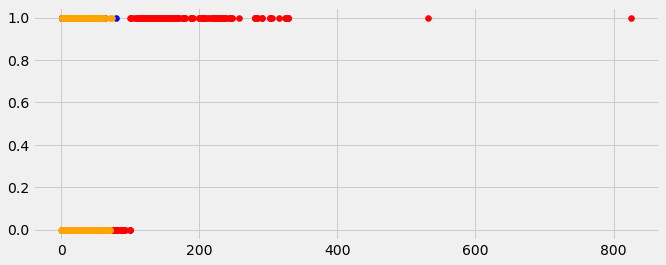

In [10]:
f, ax = plt.subplots(figsize=(10,4))
plt.scatter(y=df['HandoverResult'], x=df['BlockPropagationDelay'],color='red')
plt.scatter(y=df['HandoverResult'], x=df['BlockReceivingTime'],color='Green')
plt.scatter(y=df['HandoverResult'], x=df['CurrentAPSignal'],color='blue')
plt.scatter(y=df['HandoverResult'], x=df['NeighboringAPSignal'],color='orange')

#clearly we can see that each of the category has different set of value ranges

/home/inlab/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/inlab/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/inlab/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/inlab/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/inlab/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:129

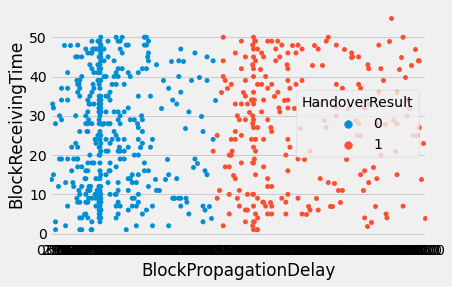

In [16]:
#Try plots using seaborn
#sns.swarmplot(x='BlockPropagationDelay',y='BlockReceivingTime',data=df,hue='HandoverResult')
#plt.show()

/home/inlab/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


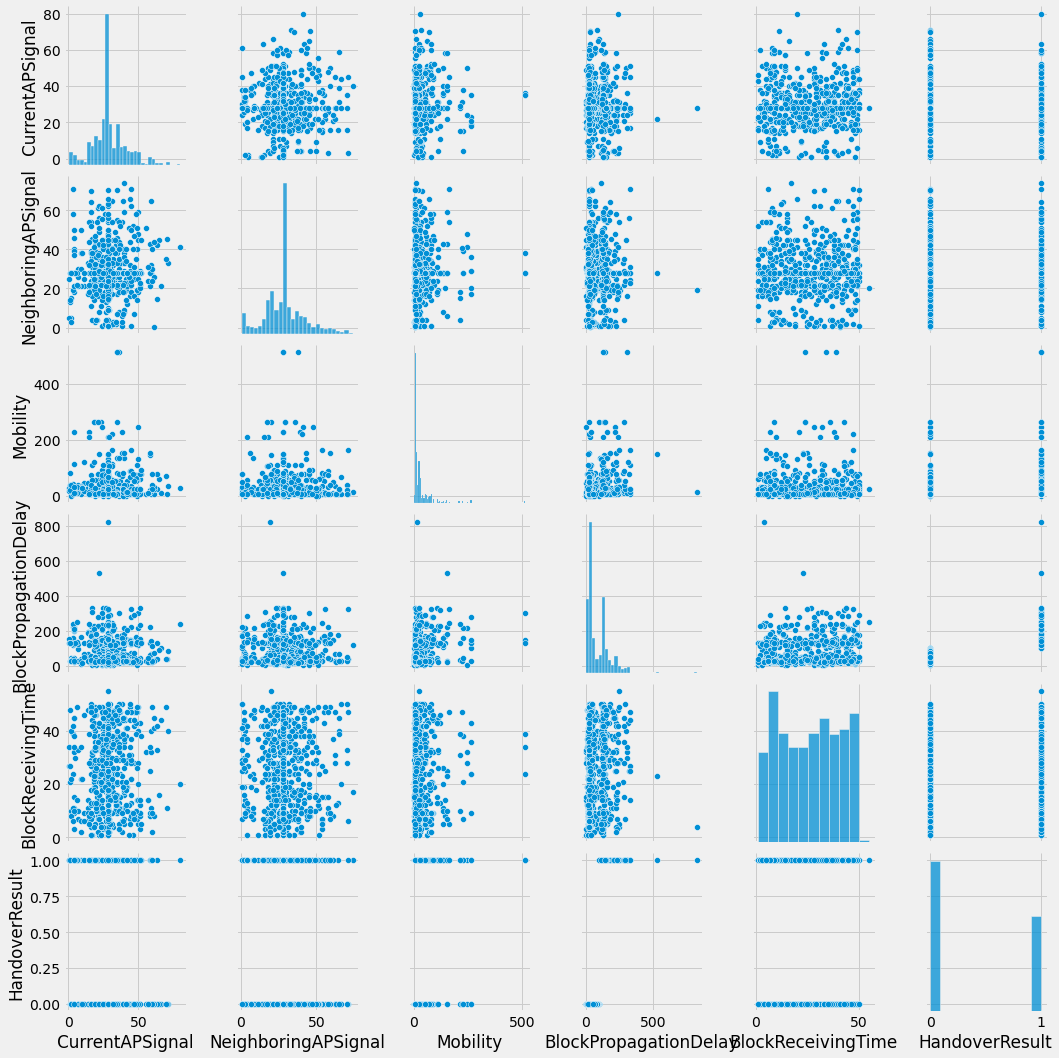

In [17]:
sns.pairplot(df,size=2.5)
plt.show()

In [18]:
#Support Vector Machine and Methods
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

y_t = np.array(df['HandoverResult'])
X_t = df
X_t = df.drop(['HandoverResult'],axis=1)
X_t = np.array(X_t)

print("Shape of Y :"+ str(y_t.shape))
print("Shape of X :"+ str(X_t.shape))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X_t)


Shape of Y :(627,)
Shape of X :(627, 5)


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X_t,y_t,test_size=.20,random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))


shape of X Train :(501, 5)
shape of X Test :(126, 5)
shape of Y Train :(501,)
shape of Y Test :(126,)


In [20]:
for this_C in [1,3,5,10,40,60,80,100]:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,Y_train)
    scoretrain = clf.score(X_train,Y_train)
    scoretest = clf.score(X_test, Y_test)
    print("Linear SVM value of C:{},training score :{:2f}, Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1,training score :0.992016, Test Score: 1.000000 

Linear SVM value of C:3,training score :0.988024, Test Score: 0.976190 

Linear SVM value of C:5,training score :0.990020, Test Score: 0.976190 

Linear SVM value of C:10,training score :0.994012, Test Score: 0.984127 

Linear SVM value of C:40,training score :0.996008, Test Score: 0.992063 

Linear SVM value of C:60,training score :0.996008, Test Score: 0.992063 

Linear SVM value of C:80,training score :0.996008, Test Score: 0.992063 

Linear SVM value of C:100,training score :0.996008, Test Score: 1.000000 



In [21]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, LeaveOneOut
clf1 = SVC(kernel='linear',C=20).fit(X_train, Y_train)
scores = cross_val_score(clf1,X_train,Y_train,cv=5)
strat_scores = cross_val_score(clf1, X_train, Y_train,cv=StratifiedKFold(5, random_state=10,shuffle=True))
#Loo = LeaveOneOut()
#Loo_scores = cross_val_score(clf1,X_train,Y_train,cv=Loo)
print("The Cross Validation Score :" + str(scores))
print("The Average Cross Validation Score :" + str(scores.mean()))
print("The Stratified Cross Validation Score : " + str(strat_scores))
print("The Average Stratified Cross Validation Score : " + str(strat_scores.mean()))
#print("The LeaveOneOut Cross Validation Score : " + str(Loo_scores))
#print("The Average LeaveOneOut Cross Validation Score : " + str(Loo_scores.mean()))


The Cross Validation Score :[0.99009901 0.99       1.         0.99       0.99      ]
The Average Cross Validation Score :0.9920198019801981
The Stratified Cross Validation Score : [0.99009901 1.         0.99       1.         1.        ]
The Average Stratified Cross Validation Score : 0.996019801980198


In [22]:
from sklearn.dummy import DummyClassifier

for strat in ['stratified', 'most_frequent','prior','uniform']:
    dummy_maj = DummyClassifier(strategy=strat).fit(X_train,Y_train)
    print("Train Strategy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_train,Y_train)))
    print("Test Strategy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_test,Y_test)))


Train Strategy :stratified 
 Score :0.55
Test Strategy :stratified 
 Score :0.58
Train Strategy :most_frequent 
 Score :0.60
Test Strategy :most_frequent 
 Score :0.64
Train Strategy :prior 
 Score :0.60
Test Strategy :prior 
 Score :0.64
Train Strategy :uniform 
 Score :0.51
Test Strategy :uniform 
 Score :0.48


In [63]:
# plotting the decision boundries for the data 
#converting the data to array for plotting. 
X = np.array(df.iloc[:,[3,4]])
y = np.array(df['HandoverResult'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))
X = scaler.fit_transform(X)


Shape of X:(627, 2)
Shape of y:(627,)


In [64]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

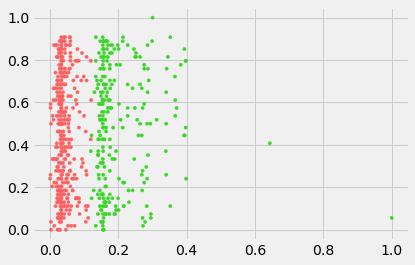

In [65]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

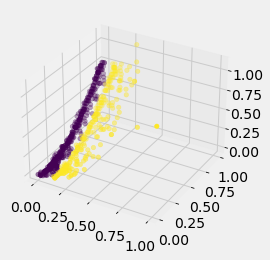

In [68]:
# adding a new dimension to X 
X1 = X[:, 0].reshape((-1, 1)) 
X2 = X[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
#X3 = X[:, 2].reshape((-1, 1)) 
X = np.hstack((X, X3)) 

# visualizing data in higher dimension 
fig = plt.figure() 
axes = fig.add_subplot(111, projection = '3d')
axes.scatter(X1, X2, X3, c = y, depthshade = True) 
#axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
plt.show() 


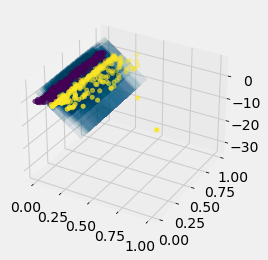

In [69]:
# create support vector classifier using a linear kernel 
from sklearn import svm 

svc = svm.SVC(kernel = 'linear') 
svc.fit(X, y) 
w = svc.coef_ 
b = svc.intercept_ 

# plotting the separating hyperplane 
x1 = X[:, 0].reshape((-1, 1)) 
x2 = X[:, 1].reshape((-1, 1)) 
x1, x2 = np.meshgrid(x1, x2) 
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 

fig = plt.figure() 
axes2 = fig.add_subplot(111, projection = '3d') 
axes2.scatter(X1, X2, X1**2 + X2**2, c = y, depthshade = True) 
axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
plt.show() 


<ipython-input-49-7318cbc697ae>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)
<ipython-input-49-7318cbc697ae>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)


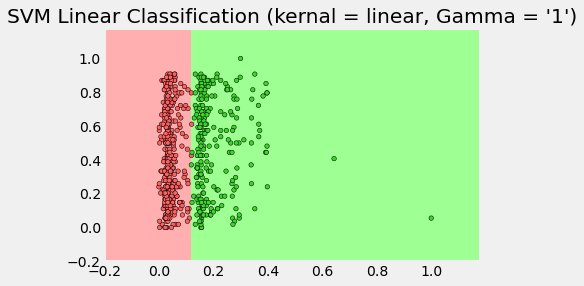

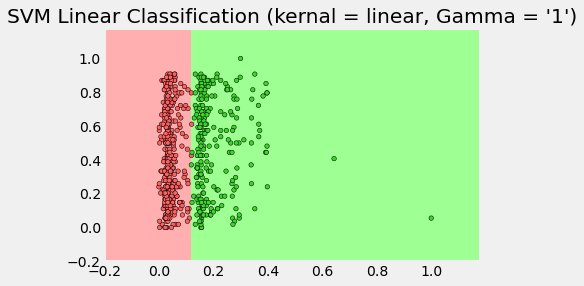

In [49]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='linear',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
    y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))

plt.show()

In [50]:
print("The score of the above :"+str(clf1.score(X,y)))

The score of the above :0.9952153110047847


In [51]:
# Linear Support vector machine with only C Parameter 
from sklearn.svm import LinearSVC

for this_C in [1,3,5,10,40,60,80,100]:
    clf2 = LinearSVC(C=this_C).fit(X_train,Y_train)
    scoretrain = clf2.score(X_train,Y_train)
    scoretest  = clf2.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.996008 , Test Score: 0.992063 

Linear SVM value of C:3, training score :0.996008 , Test Score: 0.984127 

Linear SVM value of C:5, training score :0.996008 , Test Score: 0.984127 

Linear SVM value of C:10, training score :0.996008 , Test Score: 0.992063 

Linear SVM value of C:40, training score :0.996008 , Test Score: 0.992063 

Linear SVM value of C:60, training score :0.996008 , Test Score: 1.000000 

Linear SVM value of C:80, training score :0.996008 , Test Score: 1.000000 

Linear SVM value of C:100, training score :0.996008 , Test Score: 1.000000 



/home/inlab/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/inlab/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/inlab/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/inlab/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [52]:
from sklearn.svm import SVR

svr = SVR(kernel='linear',C=1,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr.score(X_train,Y_train)))

0.72 is the accuracy of the SV Regressor


In [53]:
# SMV with RBF KERNAL AND ONLY C PARAMETER 

for this_C in [1,5,10,25,50,100]:
    clf3 = SVC(kernel='rbf',C=this_C).fit(X_train,Y_train)
    clf3train = clf3.score(X_train,Y_train)
    clf3test  = clf3.score(X_test,Y_test)
    print("SVM for Non Linear \n C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_C,clf3train,clf3test))

SVM for Non Linear 
 C:1 Training Score : 0.994012 Test Score : 0.984127

SVM for Non Linear 
 C:5 Training Score : 0.996008 Test Score : 0.984127

SVM for Non Linear 
 C:10 Training Score : 0.998004 Test Score : 1.000000

SVM for Non Linear 
 C:25 Training Score : 1.000000 Test Score : 0.992063

SVM for Non Linear 
 C:50 Training Score : 1.000000 Test Score : 0.992063

SVM for Non Linear 
 C:100 Training Score : 1.000000 Test Score : 1.000000



<ipython-input-66-36c3478154ca>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)
<ipython-input-66-36c3478154ca>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)


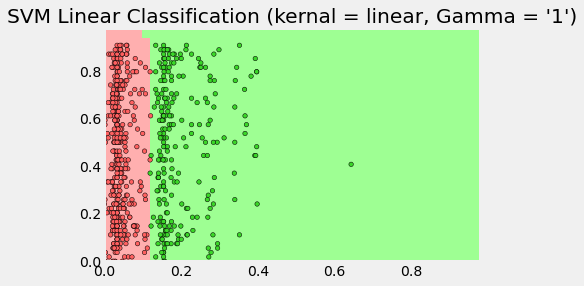

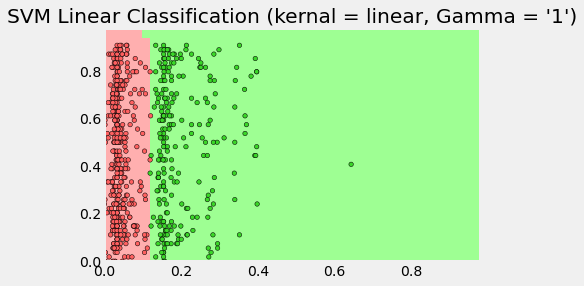

In [66]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='rbf',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))

plt.show()

In [55]:
# SVM WITH RBF KERNAL, C AND GAMMA HYPERPARAMTER 
for this_gamma in [.1,.5,.10,.25,.50,1]:
    for this_C in [1,5,7,10,15,25,50]:
        clf3 = SVC(kernel='rbf',C=this_C,gamma=this_gamma).fit(X_train,Y_train)
        clf3train = clf3.score(X_train,Y_train)
        clf3test  = clf3.score(X_test,Y_test)
        print("SVM for Non Linear \n Gamma: {} C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_gamma,this_C,clf3train,clf3test))

SVM for Non Linear 
 Gamma: 0.1 C:1 Training Score : 0.730539 Test Score : 0.777778

SVM for Non Linear 
 Gamma: 0.1 C:5 Training Score : 0.992016 Test Score : 1.000000

SVM for Non Linear 
 Gamma: 0.1 C:7 Training Score : 0.996008 Test Score : 0.992063

SVM for Non Linear 
 Gamma: 0.1 C:10 Training Score : 0.988024 Test Score : 0.976190

SVM for Non Linear 
 Gamma: 0.1 C:15 Training Score : 0.990020 Test Score : 0.976190

SVM for Non Linear 
 Gamma: 0.1 C:25 Training Score : 0.990020 Test Score : 0.976190

SVM for Non Linear 
 Gamma: 0.1 C:50 Training Score : 0.994012 Test Score : 0.984127

SVM for Non Linear 
 Gamma: 0.5 C:1 Training Score : 0.990020 Test Score : 1.000000

SVM for Non Linear 
 Gamma: 0.5 C:5 Training Score : 0.992016 Test Score : 0.984127

SVM for Non Linear 
 Gamma: 0.5 C:7 Training Score : 0.992016 Test Score : 0.984127

SVM for Non Linear 
 Gamma: 0.5 C:10 Training Score : 0.994012 Test Score : 0.984127

SVM for Non Linear 
 Gamma: 0.5 C:15 Training Score : 0.9960

In [56]:
# grid search method 
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1,5,7,10,15,25,50],
              'gamma': [.1,.5,.10,.25,.50,1]}
GS = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5)

In [57]:
GS.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 25, 50],
                         'gamma': [0.1, 0.5, 0.1, 0.25, 0.5, 1]})

In [58]:
print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_))

the parameters {'C': 1, 'gamma': 1} are the best.
the best score is 0.99.


In [59]:
# Kernalized SVM machine 
svr2 = SVR(degree=2,C=100,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of For example, here we are using two features, we can plot the decision boundary in 2D. But if how can we plot a hyper plane in 3D if we use 3 features?the SV Regressor".format(svr2.score(X_train,Y_train)))

0.93 is the accuracy of the SV Regressor
